In [1]:
import numpy as np
import pandas as pd
import pystan
from scipy.stats import norm, multivariate_normal, invwishart, invgamma, bernoulli
from statsmodels.tsa.stattools import acf
import datetime
import sys
import os

from codebase.plot import * 
from codebase.data import * 
from codebase.file_utils import save_obj, load_obj

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

%load_ext autoreload
%autoreload 2

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

In [2]:
num_chains = 1
num_samples = 1000
num_warmup = 1000
num_iter = num_samples + num_warmup

In [11]:
log_dir = "./log/bin_sim_1factor/sim0/20191121_012750_bin_sim0_m1//"
data = load_obj('data', log_dir)
ps = load_obj('ps', log_dir)
print(data['random_seed'])
ps.keys()

None


dict_keys(['beta', 'alpha', 'zz'])

In [12]:
print(open(log_dir+'model.txt').read())

data {
  int<lower=1> N;
  int<lower=1> K;
  int<lower=1> J;
  int<lower=0, upper=1> DD[N, J];
}

parameters {
  vector[J] alpha;
  matrix[J,K] beta;
  matrix[N,K] zz;
}

transformed parameters{
  matrix[N,J] yy;
  for (n in 1:N) yy[n,] = to_row_vector(alpha) + zz[n,] * beta';
}

model {
  to_vector(beta) ~ normal(0, 1);
  to_vector(alpha) ~ normal(0, 10);
  to_vector(zz) ~ normal(0, 1);
  for (j in 1:J) DD[, j] ~ bernoulli_logit(yy[, j]);
}



In [7]:
# def indx_score(data, score):
#     assert score>=1
#     J = data.shape[1]
#     df = pd.DataFrame(data)
#     df.columns = ['x'+str(i) for i in range(1,J+1)]
#     df.insert(column='s', value=np.sum(data,1), loc=0)
#     res = df[(df['s'] == score)]
#     return res.index

# indx_score(data['D'], 1)

In [8]:
def f_score(data, score):
    assert score>=1
    J = data.shape[1]
    df = pd.DataFrame(data)
    df.columns = ['x'+str(i) for i in range(1,J+1)]
    df.insert(column='s', value=np.sum(data,1), loc=0)
    res = df[(df['s'] == score)].shape[0]
    return res
f_score(data['D'], 1)

264

In [9]:
def f_item_score(data, score, item):
    J = data.shape[1]
    assert score>=1
    assert item>=1
    assert item<=J
    df = pd.DataFrame(data)
    df.columns = ['x'+str(i) for i in range(1,data.shape[1]+1)]
    df.insert(column='s', value=np.sum(data,1), loc=0)
    res = df[(df['s'] == score) & df['x'+str(item)] == 1].shape[0]
    return res

f_item_score(data['D'], 1, 2)/f_score(data['D'], 1)

0.5189393939393939

In [10]:
N = data['N']
z_nsim = 100
J = data['J'] 

post_yy = np.empty((num_samples,data['N'],data['J']))
for i in range(num_samples):
    if 'uu' in ps.keys():
        z_reps = norm.rvs(size=z_nsim*N).reshape((z_nsim,N))
        p_reps = np.empty((z_nsim,N,J))
        for z_i in range(z_nsim): 
            p_reps[z_i] = ps['alpha'][i] + np.outer(z_reps[z_i], ps['beta'][i]) + ps['uu'][i]
        post_yy[i] = np.mean(p_reps, 0)
    else:
        z_reps = norm.rvs(size=z_nsim*N).reshape((z_nsim,N))
        p_reps = np.empty((z_nsim,N,J))
        for z_i in range(z_nsim): 
            p_reps[z_i] = ps['alpha'][i] + np.outer(z_reps[z_i], ps['beta'][i])
        post_yy[i] = np.mean(p_reps, 0)
ps['yy'] = post_yy
ps['pp'] = expit(post_yy)



In [8]:
ps['zz'][0].shape

(1000,)

In [11]:
post_yy = np.empty((num_samples,data['N'],data['J']))
for i in range(num_samples):
    if 'uu' in ps.keys():
        post_yy[i] = ps['alpha'][i] + np.outer(ps['zz'][i], ps['beta'][i]) + ps['uu'][i]
    else:
        post_yy[i] = ps['alpha'][i] + np.outer(ps['zz'][i], ps['beta'][i])
ps['yy2'] = post_yy
ps['pp2'] = expit(post_yy)



In [12]:
nsim = ps['alpha'].shape[0]
pred_data_rep = np.empty((nsim, data['J'], data['J']))
for i in range(nsim):
    data_pred = bernoulli.rvs(ps['pp'][i])
    for score in range(data['J']):
        for item in range(data['J']):
            if f_score(data_pred, score+1) != 0:
                pred_data_rep[i, score, item] = f_item_score(data_pred, score+1, item+1)/f_score(data_pred, score+1)
            else:
                pred_data_rep[i, score, item] = 0 
# plot_density(pred_data_rep, true_value=f_item_score(data['D'], item, score)/f_score(data['D'], score))

In [15]:
save_obj(pred_data_rep, 'pred_data_rep', log_dir)

In [16]:
%%opts Layout [fig_size=200]
plots = []
for score in range(data['J']):
    for item in range(data['J']):
        plots.append(plot_density(pred_data_rep[:,score,item],
            true_value = f_item_score(data['D'], score+1,  item+1)/f_score(data['D'], score+1),
            title = 'Posterior distribution for PPP(%s,%s)'%(score+1,item+1)).\
                     options(fig_inches=8, aspect=3))
layout = hv.Layout(plots).options(show_title = True,
                                  vspace = .3,
                                  absolute_scaling=False,
                                  normalize=False) # use same y-range for all plots?

layout.cols(2)


:Layout
   .Overlay.Posterior_distribution_for_PPP_left_parenthesis_1_comma_1_right_parenthesis :Overlay
      .Distribution.Samples :Distribution   [Value]   (Density)
      .Curve.True_Value     :Curve   [x]   (y)
   .Overlay.Posterior_distribution_for_PPP_left_parenthesis_1_comma_2_right_parenthesis :Overlay
      .Distribution.Samples :Distribution   [Value]   (Density)
      .Curve.True_Value     :Curve   [x]   (y)
   .Overlay.Posterior_distribution_for_PPP_left_parenthesis_1_comma_3_right_parenthesis :Overlay
      .Distribution.Samples :Distribution   [Value]   (Density)
      .Curve.True_Value     :Curve   [x]   (y)
   .Overlay.Posterior_distribution_for_PPP_left_parenthesis_1_comma_4_right_parenthesis :Overlay
      .Distribution.Samples :Distribution   [Value]   (Density)
      .Curve.True_Value     :Curve   [x]   (y)
   .Overlay.Posterior_distribution_for_PPP_left_parenthesis_1_comma_5_right_parenthesis :Overlay
      .Distribution.Samples :Distribution   [Value]   (Density)
      .Curve.True_Value     :Curve   [x]   (y)
   .Overlay.Posterior_distribution_for_PPP_left_parenthesis_1_comma_6_right_parenthesis :Overlay
      .Distribution.Samples :Distribution   [Value]   (Density)
      .Curve.True_Value     :Curve   [x]   (y)
   .Overlay.Posterior_distribution_for_PPP_left_parenthesis_2_comma_1_right_parenthesis :Overlay
      .Distribution.Samples :Distribution   [Value]   (Density)
      .Curve.True_Value     :Curve   [x]   (y)
   .Overlay.Posterior_distribution_for_PPP_left_parenthesis_2_comma_2_right_parenthesis :Overlay
      .Distribution.Samples :Distribution   [Value]   (Density)
      .Curve.True_Value     :Curve   [x]   (y)
   .Overlay.Posterior_distribution_for_PPP_left_parenthesis_2_comma_3_right_parenthesis :Overlay
      .Distribution.Samples :Distribution   [Value]   (Density)
      .Curve.True_Value     :Curve   [x]   (y)
   .Overlay.Posterior_distribution_for_PPP_left_parenthesis_2_comma_4_right_parenthesis :Overlay
      .Distribution.Samples :Distribution   [Value]   (Density)
      .Curve.True_Value     :Curve   [x]   (y)
   .Overlay.Posterior_distribution_for_PPP_left_parenthesis_2_comma_5_right_parenthesis :Overlay
      .Distribution.Samples :Distribution   [Value]   (Density)
      .Curve.True_Value     :Curve   [x]   (y)
   .Overlay.Posterior_distribution_for_PPP_left_parenthesis_2_comma_6_right_parenthesis :Overlay
      .Distribution.Samples :Distribution   [Value]   (Density)
      .Curve.True_Value     :Curve   [x]   (y)
   .Overlay.Posterior_distribution_for_PPP_left_parenthesis_3_comma_1_right_parenthesis :Overlay
      .Distribution.Samples :Distribution   [Value]   (Density)
      .Curve.True_Value     :Curve   [x]   (y)
   .Overlay.Posterior_distribution_for_PPP_left_parenthesis_3_comma_2_right_parenthesis :Overlay
      .Distribution.Samples :Distribution   [Value]   (Density)
      .Curve.True_Value     :Curve   [x]   (y)
   .Overlay.Posterior_distribution_for_PPP_left_parenthesis_3_comma_3_right_parenthesis :Overlay
      .Distribution.Samples :Distribution   [Value]   (Density)
      .Curve.True_Value     :Curve   [x]   (y)
   .Overlay.Posterior_distribution_for_PPP_left_parenthesis_3_comma_4_right_parenthesis :Overlay
      .Distribution.Samples :Distribution   [Value]   (Density)
      .Curve.True_Value     :Curve   [x]   (y)
   .Overlay.Posterior_distribution_for_PPP_left_parenthesis_3_comma_5_right_parenthesis :Overlay
      .Distribution.Samples :Distribution   [Value]   (Density)
      .Curve.True_Value     :Curve   [x]   (y)
   .Overlay.Posterior_distribution_for_PPP_left_parenthesis_3_comma_6_right_parenthesis :Overlay
      .Distribution.Samples :Distribution   [Value]   (Density)
      .Curve.True_Value     :Curve   [x]   (y)
   .Overlay.Posterior_distribution_for_PPP_left_parenthesis_4_comma_1_right_parenthesis :Overlay
      .Distribution.Samples :Distribution   [Value]   (Density)
      .Curve.True_Value     :Curve   [x]   (y)
   .Overlay.Posterior_distribution_for_P

In [17]:
nsim = ps['alpha'].shape[0]
pred_data_rep2 = np.empty((nsim, data['J'], data['J']))
for i in range(nsim):
    data_pred = bernoulli.rvs(ps['pp2'][i])
    for score in range(data['J']):
        for item in range(data['J']):
            if f_score(data_pred, score+1) != 0:
                pred_data_rep2[i, score, item] = f_item_score(data_pred, score+1, item+1)/f_score(data_pred, score+1)
            else:
                pred_data_rep2[i, score, item] = 0 
save_obj(pred_data_rep2, 'pred_data_rep2', log_dir)

In [18]:
%%opts Layout [fig_size=200]
plots = []
for score in range(data['J']):
    for item in range(data['J']):
        plots.append(plot_density(pred_data_rep2[:,score,item],
            true_value = f_item_score(data['D'], score+1,  item+1)/f_score(data['D'], score+1),
            title = 'Posterior distribution for PPP(%s,%s)'%(score+1,item+1)).\
                     options(fig_inches=8, aspect=3))
layout = hv.Layout(plots).options(show_title = True,
                                  vspace = .3,
                                  absolute_scaling=False,
                                  normalize=False) # use same y-range for all plots?

layout.cols(2)


:Layout
   .Overlay.Posterior_distribution_for_PPP_left_parenthesis_1_comma_1_right_parenthesis :Overlay
      .Distribution.Samples :Distribution   [Value]   (Density)
      .Curve.True_Value     :Curve   [x]   (y)
   .Overlay.Posterior_distribution_for_PPP_left_parenthesis_1_comma_2_right_parenthesis :Overlay
      .Distribution.Samples :Distribution   [Value]   (Density)
      .Curve.True_Value     :Curve   [x]   (y)
   .Overlay.Posterior_distribution_for_PPP_left_parenthesis_1_comma_3_right_parenthesis :Overlay
      .Distribution.Samples :Distribution   [Value]   (Density)
      .Curve.True_Value     :Curve   [x]   (y)
   .Overlay.Posterior_distribution_for_PPP_left_parenthesis_1_comma_4_right_parenthesis :Overlay
      .Distribution.Samples :Distribution   [Value]   (Density)
      .Curve.True_Value     :Curve   [x]   (y)
   .Overlay.Posterior_distribution_for_PPP_left_parenthesis_1_comma_5_right_parenthesis :Overlay
      .Distribution.Samples :Distribution   [Value]   (Density)
      .Curve.True_Value     :Curve   [x]   (y)
   .Overlay.Posterior_distribution_for_PPP_left_parenthesis_1_comma_6_right_parenthesis :Overlay
      .Distribution.Samples :Distribution   [Value]   (Density)
      .Curve.True_Value     :Curve   [x]   (y)
   .Overlay.Posterior_distribution_for_PPP_left_parenthesis_2_comma_1_right_parenthesis :Overlay
      .Distribution.Samples :Distribution   [Value]   (Density)
      .Curve.True_Value     :Curve   [x]   (y)
   .Overlay.Posterior_distribution_for_PPP_left_parenthesis_2_comma_2_right_parenthesis :Overlay
      .Distribution.Samples :Distribution   [Value]   (Density)
      .Curve.True_Value     :Curve   [x]   (y)
   .Overlay.Posterior_distribution_for_PPP_left_parenthesis_2_comma_3_right_parenthesis :Overlay
      .Distribution.Samples :Distribution   [Value]   (Density)
      .Curve.True_Value     :Curve   [x]   (y)
   .Overlay.Posterior_distribution_for_PPP_left_parenthesis_2_comma_4_right_parenthesis :Overlay
      .Distribution.Samples :Distribution   [Value]   (Density)
      .Curve.True_Value     :Curve   [x]   (y)
   .Overlay.Posterior_distribution_for_PPP_left_parenthesis_2_comma_5_right_parenthesis :Overlay
      .Distribution.Samples :Distribution   [Value]   (Density)
      .Curve.True_Value     :Curve   [x]   (y)
   .Overlay.Posterior_distribution_for_PPP_left_parenthesis_2_comma_6_right_parenthesis :Overlay
      .Distribution.Samples :Distribution   [Value]   (Density)
      .Curve.True_Value     :Curve   [x]   (y)
   .Overlay.Posterior_distribution_for_PPP_left_parenthesis_3_comma_1_right_parenthesis :Overlay
      .Distribution.Samples :Distribution   [Value]   (Density)
      .Curve.True_Value     :Curve   [x]   (y)
   .Overlay.Posterior_distribution_for_PPP_left_parenthesis_3_comma_2_right_parenthesis :Overlay
      .Distribution.Samples :Distribution   [Value]   (Density)
      .Curve.True_Value     :Curve   [x]   (y)
   .Overlay.Posterior_distribution_for_PPP_left_parenthesis_3_comma_3_right_parenthesis :Overlay
      .Distribution.Samples :Distribution   [Value]   (Density)
      .Curve.True_Value     :Curve   [x]   (y)
   .Overlay.Posterior_distribution_for_PPP_left_parenthesis_3_comma_4_right_parenthesis :Overlay
      .Distribution.Samples :Distribution   [Value]   (Density)
      .Curve.True_Value     :Curve   [x]   (y)
   .Overlay.Posterior_distribution_for_PPP_left_parenthesis_3_comma_5_right_parenthesis :Overlay
      .Distribution.Samples :Distribution   [Value]   (Density)
      .Curve.True_Value     :Curve   [x]   (y)
   .Overlay.Posterior_distribution_for_PPP_left_parenthesis_3_comma_6_right_parenthesis :Overlay
      .Distribution.Samples :Distribution   [Value]   (Density)
      .Curve.True_Value     :Curve   [x]   (y)
   .Overlay.Posterior_distribution_for_PPP_left_parenthesis_4_comma_1_right_parenthesis :Overlay
      .Distribution.Samples :Distribution   [Value]   (Density)
      .Curve.True_Value     :Curve   [x]   (y)
   .Overlay.Posterior_distribution_for_P

In [6]:
%%opts Layout [fig_size=200]
plots = []
for j in range(data['J']):
        plots.append(plot_trace(ps['beta'][:,j],
             true_value=data['beta'][j],
             title = 'Posterior distribution for beta(%s)'%(j)).\
                     options(fig_inches=8, aspect=3))
layout = hv.Layout(plots).options(show_title = True,
                                  vspace = .3,
                                  absolute_scaling=False,
                                  normalize=False) # use same y-range for all plots?

layout.cols(2)


:Layout
   .Overlay.Posterior_distribution_for_beta_left_parenthesis_0_right_parenthesis :Overlay
      .Curve.Samples    :Curve   [x]   (y)
      .Curve.True_Value :Curve   [x]   (y)
   .Overlay.Posterior_distribution_for_beta_left_parenthesis_1_right_parenthesis :Overlay
      .Curve.Samples    :Curve   [x]   (y)
      .Curve.True_Value :Curve   [x]   (y)
   .Overlay.Posterior_distribution_for_beta_left_parenthesis_2_right_parenthesis :Overlay
      .Curve.Samples    :Curve   [x]   (y)
      .Curve.True_Value :Curve   [x]   (y)
   .Overlay.Posterior_distribution_for_beta_left_parenthesis_3_right_parenthesis :Overlay
      .Curve.Samples    :Curve   [x]   (y)
      .Curve.True_Value :Curve   [x]   (y)
   .Overlay.Posterior_distribution_for_beta_left_parenthesis_4_right_parenthesis :Overlay
      .Curve.Samples    :Curve   [x]   (y)
      .Curve.True_Value :Curve   [x]   (y)
   .Overlay.Posterior_distribution_for_beta_left_parenthesis_5_right_parenthesis :Overlay
      .Curve.Samples    :Curve   [x]   (y)
      .Curve.True_Value :Curve   [x]   (y)

In [9]:
%%opts Layout [fig_size=200]
plots = []
for n in range(2):
    for j in range(data['J']):
        plots.append(plot_trace(ps['uu'][:,n,j],
             title = 'Posterior distribution for u(%s,%s)'%(n,j)).\
                     options(fig_inches=8, aspect=3))
layout = hv.Layout(plots).options(show_title = True,
                                  vspace = .3,
                                  absolute_scaling=False,
                                  normalize=False) # use same y-range for all plots?

layout.cols(2)


:Layout
   .Curve.Posterior_distribution_for_u_left_parenthesis_0_comma_0_right_parenthesis :Curve   [x]   (y)
   .Curve.Posterior_distribution_for_u_left_parenthesis_0_comma_1_right_parenthesis :Curve   [x]   (y)
   .Curve.Posterior_distribution_for_u_left_parenthesis_0_comma_2_right_parenthesis :Curve   [x]   (y)
   .Curve.Posterior_distribution_for_u_left_parenthesis_0_comma_3_right_parenthesis :Curve   [x]   (y)
   .Curve.Posterior_distribution_for_u_left_parenthesis_0_comma_4_right_parenthesis :Curve   [x]   (y)
   .Curve.Posterior_distribution_for_u_left_parenthesis_0_comma_5_right_parenthesis :Curve   [x]   (y)
   .Curve.Posterior_distribution_for_u_left_parenthesis_1_comma_0_right_parenthesis :Curve   [x]   (y)
   .Curve.Posterior_distribution_for_u_left_parenthesis_1_comma_1_right_parenthesis :Curve   [x]   (y)
   .Curve.Posterior_distribution_for_u_left_parenthesis_1_comma_2_right_parenthesis :Curve   [x]   (y)
   .Curve.Posterior_distribution_for_u_left_parenthesis_1_comma_3_right_parenthesis :Curve   [x]   (y)
   .Curve.Posterior_distribution_for_u_left_parenthesis_1_comma_4_right_parenthesis :Curve   [x]   (y)
   .Curve.Posterior_distribution_for_u_left_parenthesis_1_comma_5_right_parenthesis :Curve   [x]   (y)

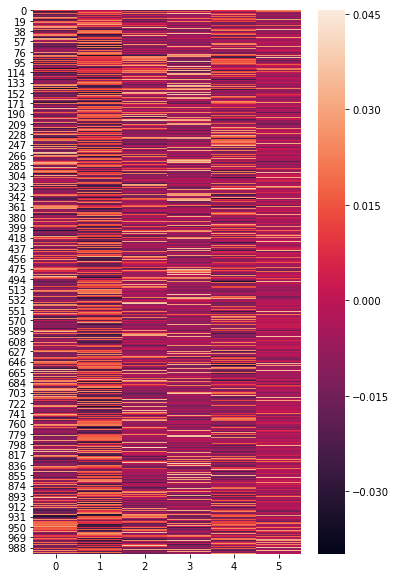

In [25]:
mu = np.mean(ps['uu'],0)
plt.figure(figsize=(6,10))
ax = sns.heatmap(mu, cbar = True )

In [26]:
print(np.round(np.mean(mu,0)*1e4, 2))
hv.Bars(np.mean(abs(mu),0)).options(color='blue', xrotation=90).options(fig_inches=8, aspect=3)

[-0.35  0.3   0.28  0.46  0.22 -0.69]


:Bars   [x]   (y)

In [9]:
print("Avg 0-900 = %.2f \nAvg 901-1000 = %.2f"%(np.mean(mu[:900])*1e3,np.mean(mu[900:])*1e3))

Avg 0-900 = -0.47 
Avg 901-1000 = 2.82


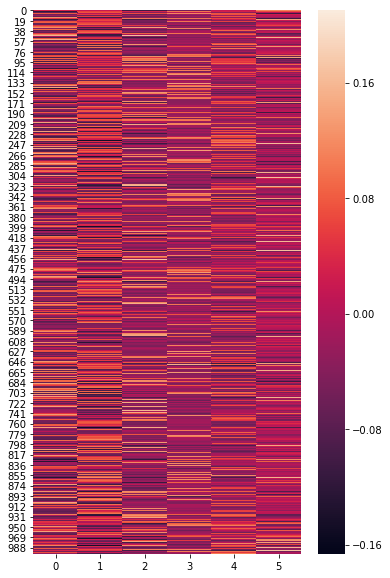

In [131]:
mu1 = np.mean(ps1['uu'],0)
plt.figure(figsize=(6,10))
ax = sns.heatmap(mu1, cbar = True )

In [132]:
print(np.round(np.mean(mu1,0)*1e4, 2))
hv.Bars(np.mean(abs(mu1),0)).options(color='blue', xrotation=90).options(fig_inches=8, aspect=3)

[ 4.36 -5.07  2.01 -3.42 -0.86  7.56]


:Bars   [x]   (y)

In [16]:
print("Avg 0-900 = %.2f \nAvg 901-1000 = %.2f"%(np.mean(mu[:900])*1e3,np.mean(mu[900:])*1e3))

Avg 0-900 = -0.47 
Avg 901-1000 = 2.82


In [12]:
np.mean(mu[:900],0)*1e3

array([-0.51651523,  0.27647594, -0.59786509, -0.29971204, -1.14736767,
       -0.52713823])

In [17]:
np.mean(mu[900:],0)*1e3

array([ 6.24278446, -0.51357661,  1.90470316, -3.31539368,  9.28697307,
        3.34353571])

In [21]:
data['y'][900:, 3:]

array([[-2.88804388, -3.82499607, -4.33257378],
       [-2.09574168, -2.29954194, -3.26631248],
       [-1.0258393 , -0.239612  , -1.82646349],
       [-1.20626283, -0.58698935, -2.06927317],
       [-2.26706032, -2.62938923, -3.496869  ],
       [ 0.45553262,  2.61253826,  0.16713133],
       [-1.93096811, -1.98229617, -3.04456416],
       [-2.60601095, -3.28198572, -3.95302063],
       [-0.42201412,  0.92295906, -1.01385004],
       [-0.04701402,  1.64496318, -0.5091839 ],
       [-2.23220797, -2.56228647, -3.44996554],
       [-2.82657154, -3.70664069, -4.24984579],
       [-0.35101384,  1.059659  , -0.91829957],
       [-3.48417544, -4.97275428, -5.13483335],
       [-2.64870085, -3.36417845, -4.01047167],
       [-0.41513982,  0.93619445, -1.00459877],
       [-1.45634889, -1.06849099, -2.40583299],
       [-1.66868822, -1.4773172 , -2.69159417],
       [-1.04083269, -0.26847945, -1.84664125],
       [-1.55552436, -1.25943787, -2.53930096],
       [-2.72206308, -3.50542598, -4.109

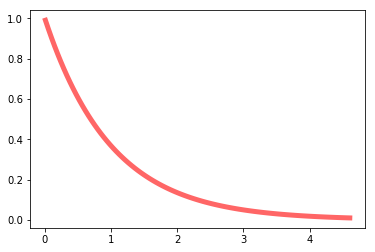

In [24]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)
from scipy.stats import expon
x = np.linspace(expon.ppf(0.01),
                expon.ppf(0.99), 100)
ax.plot(x, expon.pdf(x),
       'r-', lw=5, alpha=0.6, label='expon pdf')

In [41]:
x = expon.rvs(loc = 0, scale = 1/5, size = 1000)
np.percentile(x, q=[0,95])

array([1.79792374e-04, 5.85099091e-01])

## Residual Analysis

In [135]:
# %%opts Bars {+axiswise} [width=1000, height=300, ] 
res = pd.DataFrame(np.mean(abs(np.mean(ps1['uu'], 0)),1))
res.columns = ['avg_u']
res.reset_index(inplace=True)
res.sort_values('avg_u', ascending=False, inplace=True)
hv.Bars(res[:20],).options(color='blue', xrotation=90).options(fig_inches=8, aspect=3)


:Bars   [index]   (avg_u)